In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
from matplotlib import style
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
from tensorflow.keras.layers import Dense, Dropout
%matplotlib inline

In [2]:
df = pd.read_excel("RomaniaEDF.xlsx")
df=df.dropna()
df["Datetime"]=pd.to_datetime(df[["Year", "Month", "Day", "Hour"]])
del df["Year"]
del df["Month"]
del df["Day"]
del df["Hour"]

In [3]:
dataset = df
dataset["Month"] = pd.to_datetime(df["Datetime"]).dt.month
dataset["Year"] = pd.to_datetime(df["Datetime"]).dt.year
dataset["Date"] = pd.to_datetime(df["Datetime"]).dt.date
dataset["Time"] = pd.to_datetime(df["Datetime"]).dt.time
dataset["Week"] = pd.to_datetime(df["Datetime"]).dt.week
dataset["Day"] = pd.to_datetime(df["Datetime"]).dt.day_name()
dataset = df.set_index("Datetime")
dataset.index = pd.to_datetime(dataset.index)
dataset.head(5)


,Value,Month,Year,Date,Time,Week,Day
Datetime,,,,,,,
2006-01-01 00:00:00,5957.0,1,2006,2006-01-01,00:00:00,52,Sunday
2006-01-01 01:00:00,5837.0,1,2006,2006-01-01,01:00:00,52,Sunday
2006-01-01 02:00:00,5592.0,1,2006,2006-01-01,02:00:00,52,Sunday
2006-01-01 03:00:00,5383.0,1,2006,2006-01-01,03:00:00,52,Sunday
2006-01-01 04:00:00,5201.0,1,2006,2006-01-01,04:00:00,52,Sunday


No handles with labels found to put in legend.


Text(0.5, 1.0, 'Energy Consumption According to Year')

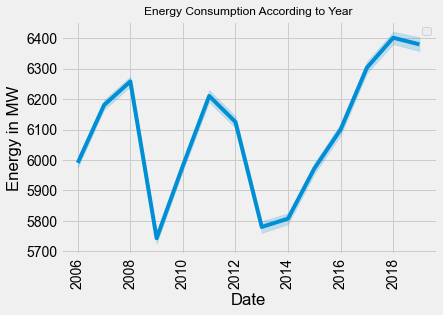

In [4]:
plt.style.use('fivethirtyeight')
fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')

sns.lineplot(x=dataset["Year"], y=dataset["Value"], data=df)
sns.set(rc={'figure.figsize':(15,6)})

plt.title("Energy consumptionnin Year 2004")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)


plt.title("Energy Consumption According to Year")

No handles with labels found to put in legend.


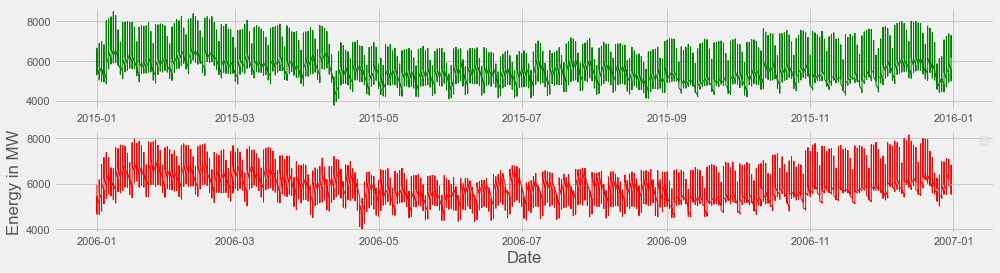

In [6]:
plt.style.use('fivethirtyeight')

fig = plt.figure()


ax2= fig.add_subplot(312)
ax3= fig.add_subplot(313)


style.use('ggplot')

y_2015 = dataset["2015"]["Value"].to_list()
x_2015 = dataset["2015"]["Date"].to_list()
ax2.plot(x_2015, y_2015, color="green", linewidth=1)


y_2006 = dataset["2006"]["Value"].to_list()
x_2006 = dataset["2006"]["Date"].to_list()
ax3.plot(x_2006, y_2006, color="red", linewidth=1)


plt.rcParams["figure.figsize"] = (18,8)
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

Text(0.5, 1.0, 'Ennergy Distribution')

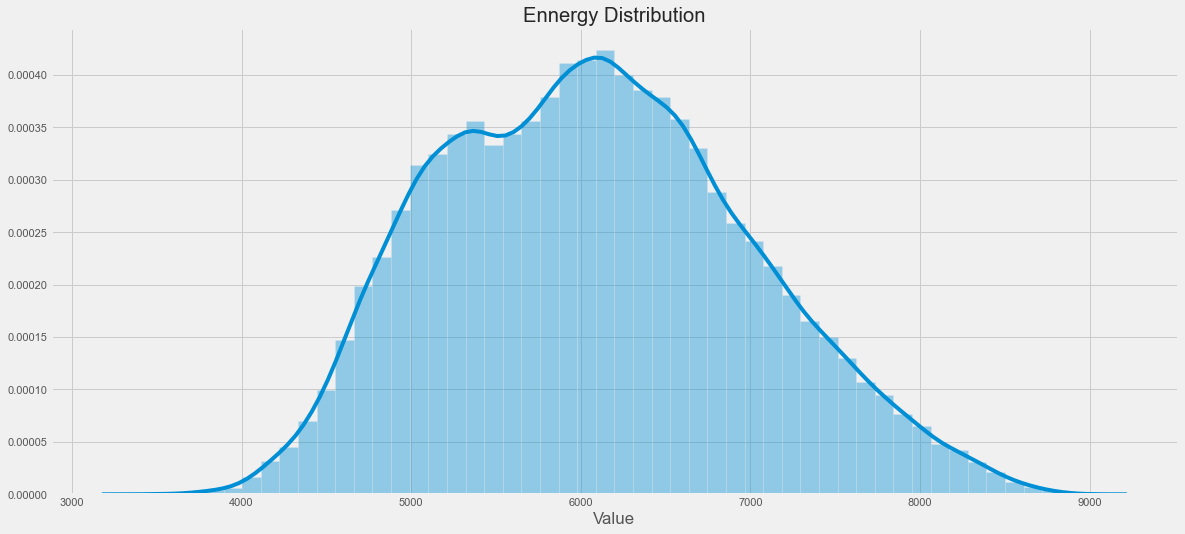

In [7]:
plt.style.use('fivethirtyeight')

sns.distplot(dataset["Value"])
plt.title("Ennergy Distribution")

In [8]:
NewDataSet = dataset.resample('D').median()
NewDataSet = NewDataSet.dropna()

In [9]:
NewDataSet

,Value,Month,Year,Week
Datetime,,,,
2006-01-01,5055.0,1,2006,52
2006-01-02,5147.0,1,2006,1
2006-01-03,6211.5,1,2006,1
2006-01-04,6426.5,1,2006,1
2006-01-05,6696.0,1,2006,1
...,...,...,...,...
2019-08-27,7155.0,8,2019,35
2019-08-28,7130.5,8,2019,35
2019-08-29,6916.0,8,2019,35


In [10]:
TestData = NewDataSet.tail(100)

Training_Set = NewDataSet.iloc[:,0:1]

Training_Set = Training_Set[:-60]

Training_Set = Training_Set
sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)

In [11]:
X_Train = []
Y_Train = []


for i in range(60, Train.shape[0]):
    
    # X_Train 0-59 
    X_Train.append(Train[i-60:i])

    Y_Train.append(Train[i])

# Convert into Numpy Array
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(4871, 60, 1)
(4871, 1)


In [12]:
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
X_Train.shape

(4871, 60, 1)

In [14]:
regressor = Sequential()


regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
regressor.add(Dropout(0.1))


regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
regressor.add(Dropout(0.1))


regressor.add(LSTM(units = 100))
regressor.add(Dropout(0.1))


regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [15]:
regressor.fit(X_Train, Y_Train, epochs = 25, batch_size = 12)

Epoch 1/25
406/406 [==============================] - 20s 41ms/step - loss: 0.0294
Epoch 2/25
406/406 [==============================] - 17s 41ms/step - loss: 0.0192
Epoch 3/25
406/406 [==============================] - 17s 42ms/step - loss: 0.0177
Epoch 4/25
406/406 [==============================] - 17s 41ms/step - loss: 0.0139
Epoch 5/25
406/406 [==============================] - 16s 40ms/step - loss: 0.0091
Epoch 6/25
406/406 [==============================] - 16s 40ms/step - loss: 0.0073
Epoch 7/25
406/406 [==============================] - 16s 40ms/step - loss: 0.0058
Epoch 8/25
406/406 [==============================] - 17s 41ms/step - loss: 0.0054
Epoch 9/25
406/406 [==============================] - 16s 40ms/step - loss: 0.0057
Epoch 10/25
406/406 [==============================] - 36s 89ms/step - loss: 0.0053
Epoch 11/25
406/406 [==============================] - 17s 42ms/step - loss: 0.0045
Epoch 12/25
406/406 [==============================] - 16s 40ms/step - loss: 0.0041
E

In [16]:
Df_Total = pd.concat((NewDataSet[["Value"]], TestData[["Value"]]), axis=0)

In [17]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values
inputs.shape

(160, 1)

In [18]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 160):
    X_test.append(inputs[i-60:i])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

 
predicted_stock_price = regressor.predict(X_test)

predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [19]:
True_MegaWatt = TestData["Value"].to_list()
Predicted_MegaWatt  = predicted_stock_price
dates = TestData.index.to_list()

In [20]:
Machine_Df = pd.DataFrame(data={
    "Date":dates,
    "TrueMegaWatt": True_MegaWatt,
    "PredictedMeagWatt":[x[0] for x in Predicted_MegaWatt ]
})

In [21]:
Machine_Df

,Date,TrueMegaWatt,PredictedMeagWatt
0,2019-05-24,6376.0,5863.598145
1,2019-05-25,5717.5,7671.331543
2,2019-05-26,5025.0,6206.610840
3,2019-05-27,6281.5,5622.199707
4,2019-05-28,6474.0,6803.413086
...,...,...,...
95,2019-08-27,7155.0,7077.204590
96,2019-08-28,7130.5,7098.122559
97,2019-08-29,6916.0,7064.617676
98,2019-08-30,7040.5,6688.709961


In [22]:
True_MegaWatt = TestData["Value"].to_list()
Predicted_MegaWatt  = [x[0] for x in Predicted_MegaWatt ]
dates = TestData.index.to_list()

No handles with labels found to put in legend.


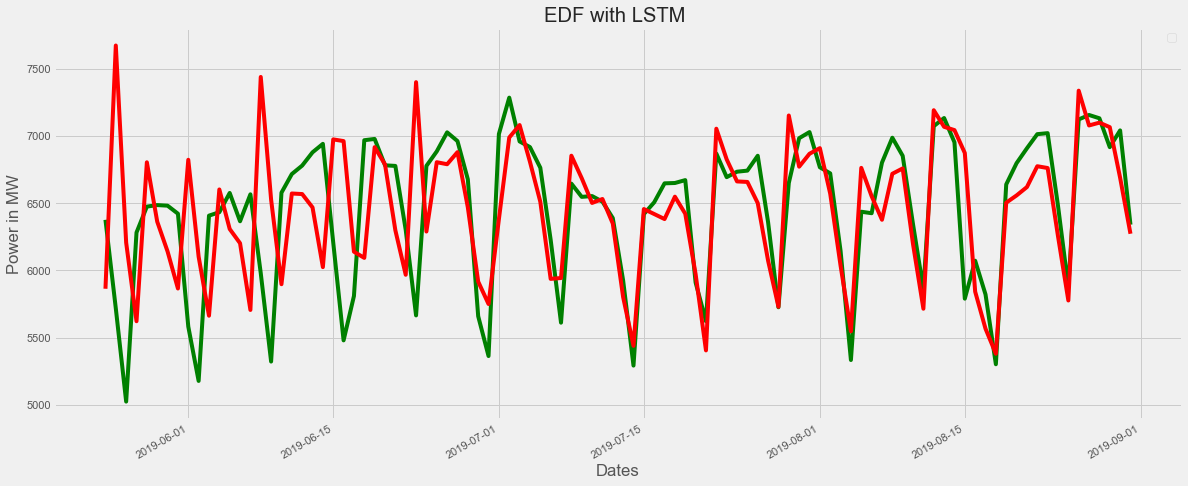

In [23]:
plt.style.use('seaborn-pastel')
fig = plt.figure()

ax1= fig.add_subplot(111)

x = dates
y = True_MegaWatt

y1 = Predicted_MegaWatt

plt.plot(x,y, color="green")
plt.plot(x,y1, color="red")
# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.xlabel('Dates')
plt.ylabel("Power in MW")
plt.title("EDF with LSTM ")
plt.legend()

In [24]:
Machine_Df.head(10)



,Date,TrueMegaWatt,PredictedMeagWatt
0,2019-05-24,6376.0,5863.598145
1,2019-05-25,5717.5,7671.331543
2,2019-05-26,5025.0,6206.610840
3,2019-05-27,6281.5,5622.199707
4,2019-05-28,6474.0,6803.413086
5,2019-05-29,6485.5,6362.468750
6,2019-05-30,6481.0,6140.620605
7,2019-05-31,6421.5,5865.538574
8,2019-06-01,5582.5,6821.950195
9,2019-06-02,5178.5,6101.760254


In [25]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) 

In [26]:
mape(Machine_Df[["TrueMegaWatt"]],Machine_Df[["PredictedMeagWatt"]])

0.0570765144074323

In [33]:
from sklearn.metrics import mean_squared_error
import math

In [36]:
MSE = mean_squared_error(Machine_Df[["TrueMegaWatt"]],Machine_Df[["PredictedMeagWatt"]])
 
RMSE = math.sqrt(MSE)

RMSE



519.7632413553717

In [30]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Machine_Df[["TrueMegaWatt"]],Machine_Df[["PredictedMeagWatt"]])



350.66095703125